In [1]:
import os
import glob
import geopandas as gpd
import contextily as ctx
from asp_plot.altimetry import Altimetry

In [2]:
directory = "/Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00"

dem_fn = glob.glob(os.path.join(directory, "stereo*/*DEM_1m.tif"))[0]
try:
    aligned_dem_fn = glob.glob(os.path.join(directory, "stereo*/*DEM_1m*pc_align*.tif"))[0]
except:
    aligned_dem_fn = None

icesat_directory = os.path.join(directory, "icesat_data")
os.makedirs(icesat_directory, exist_ok=True)

plots_directory = os.path.join(directory, "asp_plots")
os.makedirs(plots_directory, exist_ok=True)

map_crs = "32604"

ctx_kwargs = {
    "crs": f"EPSG:{map_crs}",
    "source": ctx.providers.Esri.WorldImagery,
    "attribution_size": 0,
    "alpha": 0.5,
}

In [3]:
icesat = Altimetry(directory=directory, dem_fn=dem_fn, aligned_dem_fn=aligned_dem_fn)

In [4]:
icesat.request_atl06sr_multi_processing(
    save_to_parquet=True,
)

# icesat.request_atl06sr_multi_processing(
#     res=10,
#     len=20,
#     ats=20,
#     cnt=5,
#     maxi=5,
#     save_to_parquet=True,
# )


ICESat-2 ATL06 request processing for: high_confidence
Existing file found, reading in: atl06sr_res20_len40_cnt10_ats20_maxi5_high_confidence.parquet
Filtering ATL06-SR high_confidence
Existing file found, reading in: atl06sr_res20_len40_cnt10_ats20_maxi5_high_confidence_filtered.parquet

ICESat-2 ATL06 request processing for: ground
Existing file found, reading in: atl06sr_res20_len40_cnt10_ats20_maxi5_ground.parquet
Filtering ATL06-SR ground
Existing file found, reading in: atl06sr_res20_len40_cnt10_ats20_maxi5_ground_filtered.parquet

ICESat-2 ATL06 request processing for: canopy
Existing file found, reading in: atl06sr_res20_len40_cnt10_ats20_maxi5_canopy.parquet
Filtering ATL06-SR canopy
Existing file found, reading in: atl06sr_res20_len40_cnt10_ats20_maxi5_canopy_filtered.parquet

ICESat-2 ATL06 request processing for: top_of_canopy
Existing file found, reading in: atl06sr_res20_len40_cnt10_ats20_maxi5_top_of_canopy.parquet
Filtering ATL06-SR top_of_canopy
Existing file found, r

In [5]:
icesat.atl06sr_processing_levels["high_confidence"].shape

(142959, 20)

In [6]:
icesat.atl06sr_processing_levels_filtered["high_confidence"].shape

(120226, 20)

In [7]:
# Filter by ESA WorldCover
icesat.filter_esa_worldcover()

In [8]:
icesat.atl06sr_processing_levels_filtered["high_confidence"].shape

(34372, 20)

In [9]:
# User defined temporal filter
# icesat.generic_temporal_filter_atl06sr(
#     select_years=[2021, 2022, 2023],
#     select_months=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
#     select_days=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
# )

In [10]:
# Predefined temporal filter
icesat.predefined_temporal_filter_atl06sr()


Filtering ATL06 with 15 day pad, 90 day pad, and seasonal pad around 2022-04-17 22:52:18.495475 for: high_confidence

Filtering ATL06 with 15 day pad, 90 day pad, and seasonal pad around 2022-04-17 22:52:18.495475 for: ground

Filtering ATL06 with 15 day pad, 90 day pad, and seasonal pad around 2022-04-17 22:52:18.495475 for: canopy

Filtering ATL06 with 15 day pad, 90 day pad, and seasonal pad around 2022-04-17 22:52:18.495475 for: top_of_canopy


In [11]:
icesat.atl06sr_processing_levels_filtered["ground_seasonal"].shape

(12092, 20)

In [12]:
# Write out filtered data to CSVs that can be ingested by pc_align
icesat.to_csv_for_pc_align()

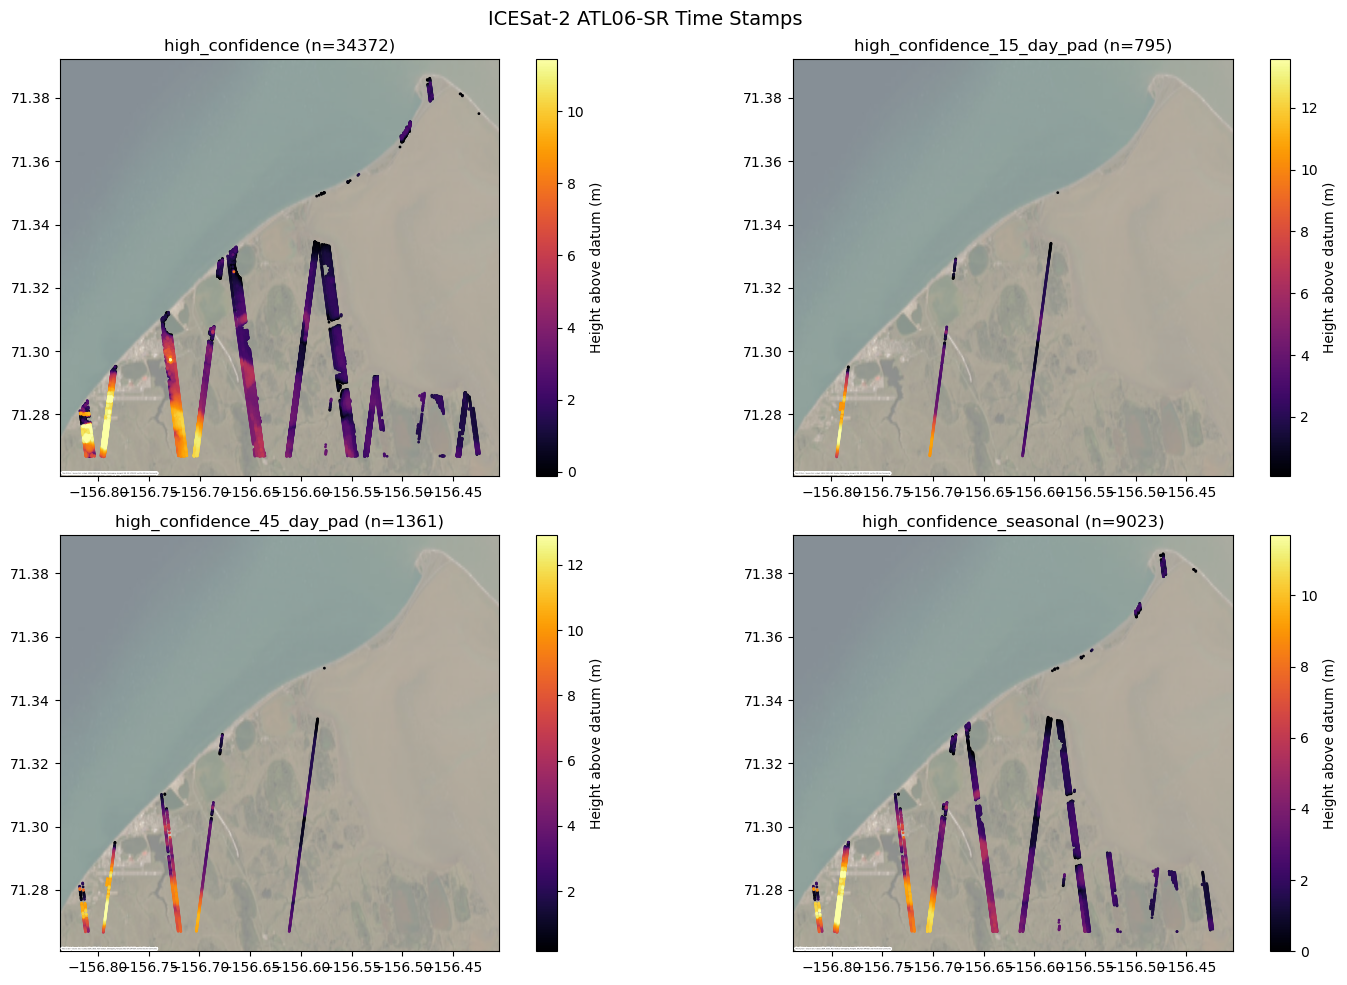

In [13]:
icesat.plot_atl06sr_time_stamps(
   key="high_confidence",
   figsize=(15, 10),
   save_dir=None,
   fig_fn=None,
   **ctx_kwargs,
)

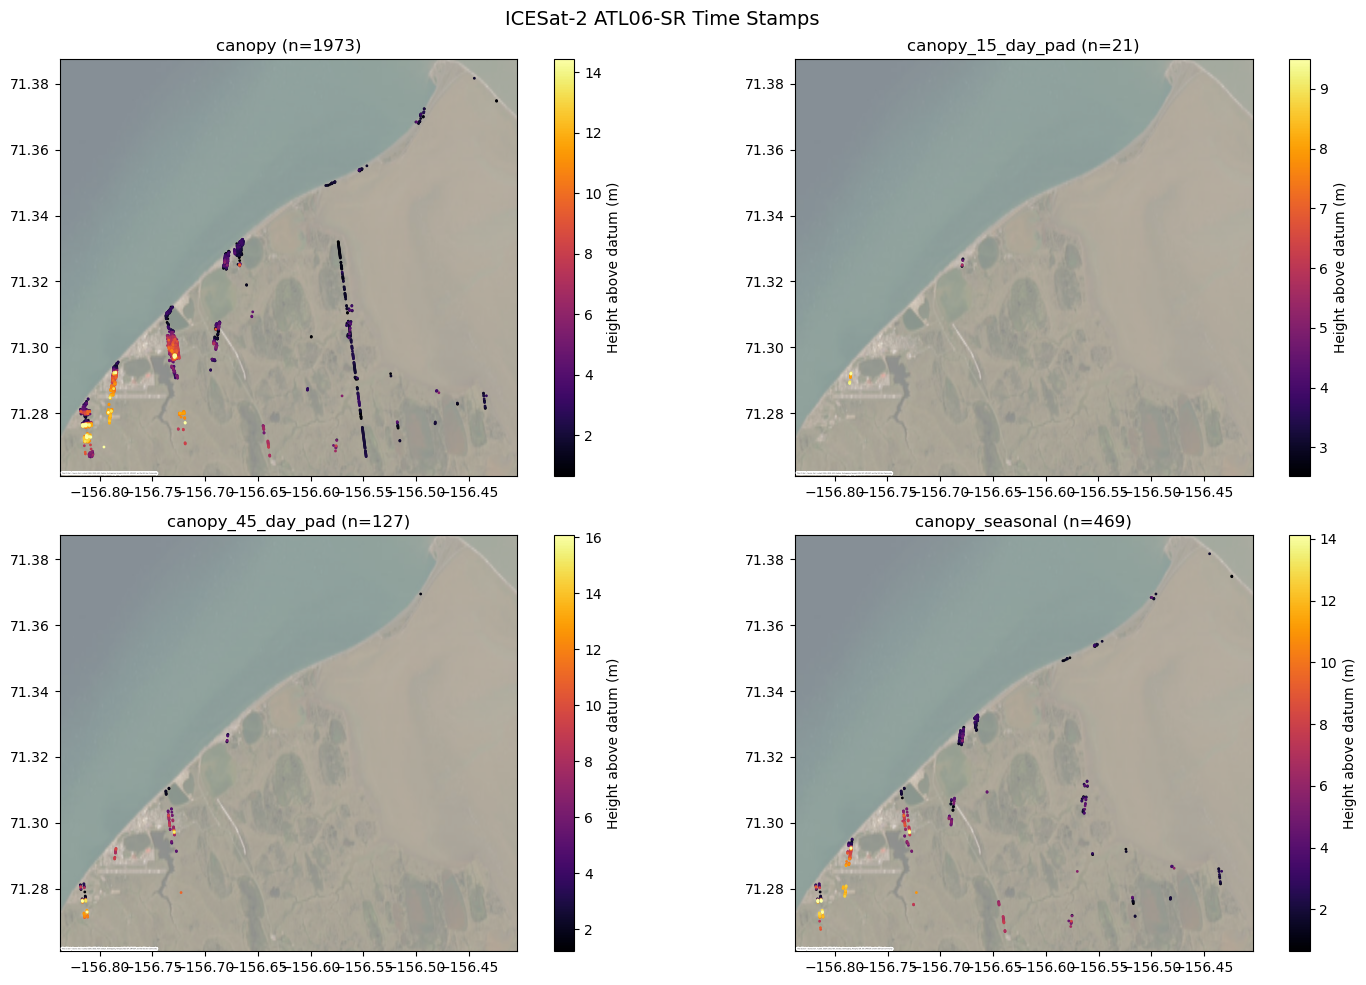

In [14]:
icesat.plot_atl06sr_time_stamps(
   key="canopy",
   figsize=(15, 10),
   save_dir=None,
   fig_fn=None,
   **ctx_kwargs,
)

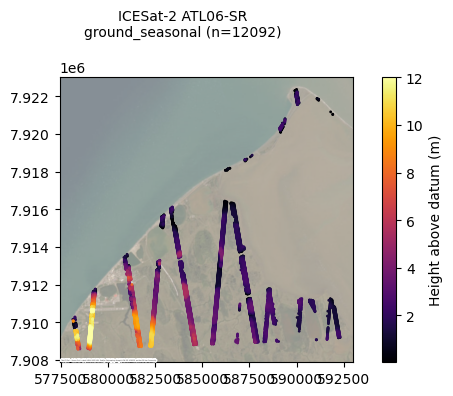

In [15]:
icesat.plot_atl06sr(
    key="ground_seasonal",
    map_crs=map_crs,
    cmap="inferno",
    plot_dem=False,
    **ctx_kwargs
)

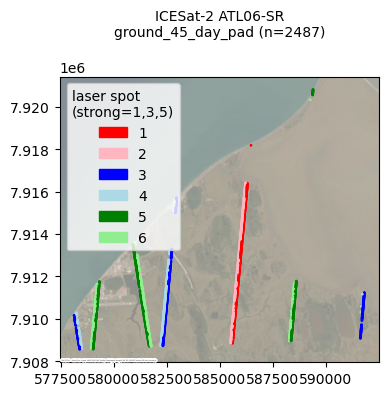

In [16]:
icesat.plot_atl06sr(
    key="ground_45_day_pad",
    map_crs=map_crs,
    cmap="inferno",
    plot_dem=False,
    plot_beams=True,
    **ctx_kwargs
)

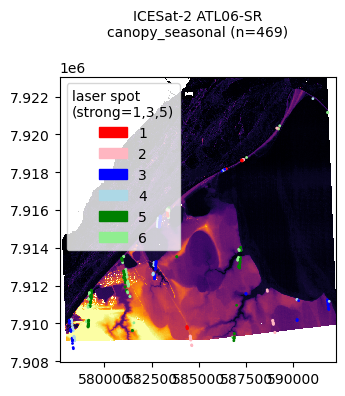

In [17]:
icesat.plot_atl06sr(
    key="canopy_seasonal",
    map_crs=map_crs,
    cmap="inferno",
    plot_dem=True,
    plot_beams=True,
    **ctx_kwargs
)

In [18]:
icesat.atl06sr_to_dem_dh()

In [19]:
icesat.atl06sr_processing_levels_filtered["ground_15_day_pad"][["icesat_minus_dem", "icesat_minus_aligned_dem"]].describe()

,icesat_minus_dem,icesat_minus_aligned_dem
count,1424.000000,1423.000000
mean,0.714710,-0.069167
std,0.517729,0.516826
min,-8.279421,-9.033586
25%,0.677098,-0.105930
50%,0.767425,-0.015643
75%,0.863918,0.079351
max,1.602890,0.787521


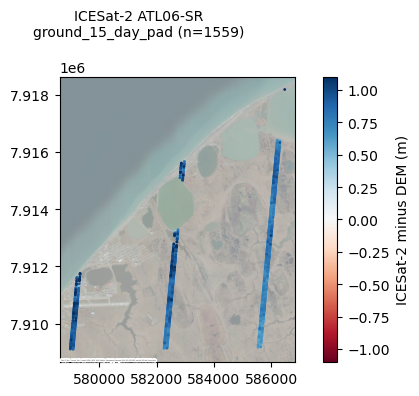

In [20]:
icesat.mapview_plot_atl06sr_to_dem(
    key="ground_15_day_pad",
    **ctx_kwargs,
)

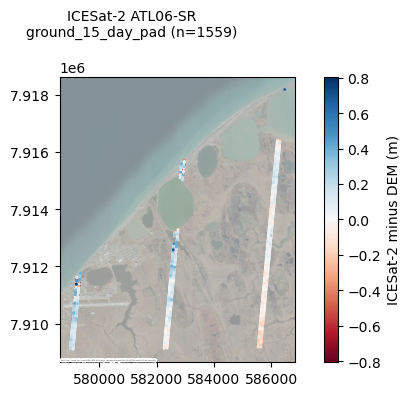

In [21]:
icesat.mapview_plot_atl06sr_to_dem(
    key="ground_15_day_pad",
    plot_aligned=True,
    **ctx_kwargs,
)

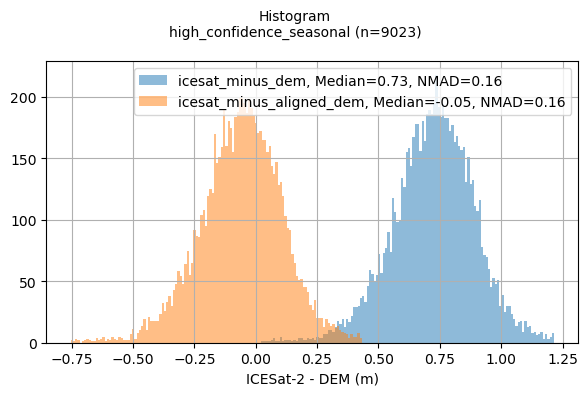

In [22]:
# Show a quick histogram
icesat.histogram(
    key="high_confidence_seasonal",
    plot_aligned=True,
)

## WIP: PC Alignment Comparison

In [23]:
# Previous mismatch indicates need for pc_align step
# icesat.pc_align_dem_to_atl06sr(
#     atl06sr_csv=os.path.join(icesat_directory, "atl06sr_defaults_filtered.csv"),
#     output_prefix=os.path.join(directory, "pc_align/pc_align"),
# )

In [24]:
# Report
# report = icesat.pc_align_report(
#     pc_align_folder=os.path.join(directory, "pc_align")
# )
# print(report)

In [25]:
# SLOW: uses point2dem
# icesat.generate_translated_dem(
#     pc_align_output=os.path.join(directory, "pc_align/pc_align-trans_reference.tif"),
#     dem_out_fn=dem_fn.replace(".tif", "_pc_align_translated"),
# )

# FAST
# icesat.apply_dem_translation(
#     pc_align_folder=os.path.join(directory, "pc_align"),
# )


In [26]:
# Quickly compare the translated DEM to the ATL06 data
# icesat.mapview_plot_atl06sr_to_dem(
#     title="ICESat-2 minus aligned DEM",
#     plot_aligned=True, 
#     **ctx_kwargs
# )

# icesat.mapview_plot_atl06sr_to_dem(
#     title="ICESat-2 minus aligned DEM (supplied colorscale)",
#     clim=(-0.5, 0.5),
#     plot_aligned=True,
#     **ctx_kwargs
# )

In [27]:
# Show a quick histogram
# icesat.histogram(plot_aligned=True)

In [28]:
# Gather a larger subset of data for validation
# icesat.filter_atl06sr(
#     h_sigma_quantile=0.95,
#     mask_worldcover_water=False,
#     select_months=[3, 4, 5],
#     save_to_csv=False,
#     save_to_parquet=False,
#     filename=os.path.join(icesat_directory, "atl06sr_filtered_noWaterMask_MarchAprilMay_allTime_for_validation"),
# )

In [29]:
# recalculate dh with newly filtered points
# icesat.atl06sr_to_dem_dh()

In [30]:
# Validate (before and after)
# icesat.mapview_plot_atl06sr_to_dem(
#     title=f"Before Alignment: Mapview of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})",
#     plot_aligned=False, 
#     **ctx_kwargs
# )

# icesat.mapview_plot_atl06sr_to_dem(
#     title=f"After Alignment: Mapview of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})",
#     plot_aligned=True, 
#     **ctx_kwargs
# )

# icesat.histogram(
#     title=f"Histogram of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})",
#     plot_aligned=True
# )

## WIP: Profile plots

In [31]:
# Collect only the coincident filtereded data again for profile plotting
# icesat.filter_atl06sr(
#     h_sigma_quantile=0.95,
#     mask_worldcover_water=True,
#     save_to_csv=False,
#     select_months=[4],
#     select_years=[2022],
# )

In [32]:
# icesat.plot_atl06sr(
#     title=f"Cleaned beam strengths (n={icesat.atl06sr_filtered.shape[0]})",
#     filtered=True,
#     plot_beams=True,
#     plot_dem=False,
#     map_crs=map_crs,
#     **ctx_kwargs
# )

# icesat.plot_atl06sr_dem_profiles(title="Profiles", only_strong_beams=True)